In [278]:
# %matplotlib inline=
# 显示函数图像

In [279]:
import pandas as pd
import numpy as np
import warnings
from pandas import Series, DataFrame
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [280]:
train = pd.read_csv('D:/Python/Kaggle竞赛/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('D:/Python/Kaggle竞赛/house-prices-advanced-regression-techniques/test.csv')

In [281]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [282]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [283]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [284]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [285]:
mssubclass = train.groupby('MSSubClass').SalePrice.value_counts()
mssubclass

MSSubClass  SalePrice
20          139000       7
            155000       7
            110000       6
            115000       6
            135000       6
                        ..
190         157000       1
            163000       1
            168000       1
            200000       1
            228950       1
Name: SalePrice, Length: 1099, dtype: int64

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

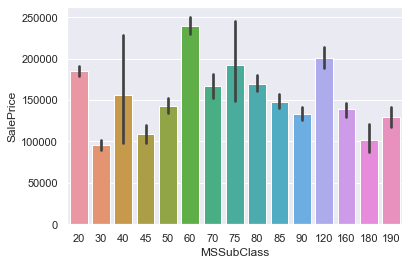

In [286]:
sns.barplot(x='MSSubClass', y='SalePrice', data=train)

In [287]:
# 使用常数处理这个离散变量
col = train.MSSubClass.value_counts().index
col
    

Int64Index([20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40], dtype='int64')

In [288]:
# 处理 mssubclass
def mssubclassPrecess(input_):
    for i, ind in enumerate(input_.MSSubClass):
        if ind in [30, 45, 180]:
            input_.MSSubClass[i] = 1
        elif ind in [40, 50, 85, 90, 190]:
            input_.MSSubClass[i] = 2
        elif ind in [20, 70, 75, 808, 120]:
            input_.MSSubClass[i] = 3
        elif ind in [60]:
            input_.MSSubClass[i] = 4
mssubclassPrecess(train)
mssubclassPrecess(test)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

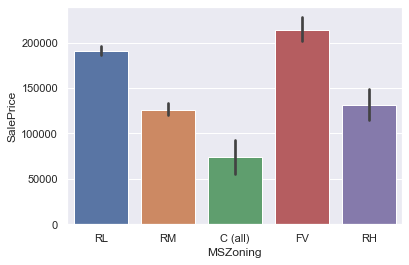

In [289]:
mszoning = train.MSZoning.value_counts()
sns.barplot(x='MSZoning', y='SalePrice', data=train)

In [290]:
def mszoningPrecess(input_):
    for i, ind in enumerate(input_.MSZoning):
        if ind in ['C (all) ']:
            input_.MSZoning[i] = 1
        elif ind in ['RM', 'RH']:
            input_.MSZoning[i] = 2
        elif ind in ['RL', 'FV']:
            input_.MSZoning[i] = 3
mszoningPrecess(train)
mszoningPrecess(test)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

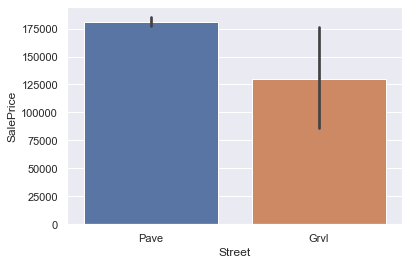

In [291]:
sns.barplot(x='Street', y='SalePrice', data=train)

In [292]:
def streetprocess(input_):
    for i, ind in enumerate(input_.Street):
        if ind == 'Pave':
            input_.Street[i] = 7
        elif ind == 'Grvl':
            input_.Street[i] = 5
streetprocess(train)
streetprocess(test)

In [293]:
# alley 小巷子
# 填入nan
def colInput(input_, col, target):
    for i, elem in enumerate(input_[col]):
        if isinstance(elem, float):
            # 奇了怪了，这个nan竟然是float类型
            input_[col][i] = target

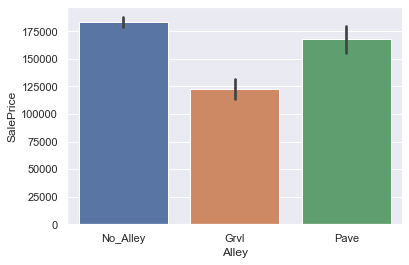

In [294]:
colInput(train, 'Alley', 'No_Alley')
sns.barplot(x='Alley', y='SalePrice', data=train)

colInput(test, 'Alley', 'No_Alley')

In [295]:
def alleyPrecess(input_):
    for i, ind in enumerate(input_.Alley):
        if ind in ['No_Alley']:
            input_.Alley[i] = 7
        elif ind in ['Grvl']:
            input_.Alley[i] = 4
        elif ind in ['Pave']:
            input_.Alley[i] = 6
alleyPrecess(train)
alleyPrecess(test)

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

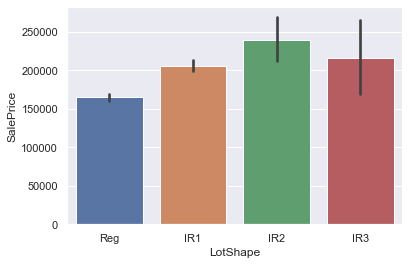

In [296]:
sns.barplot(x='LotShape', y='SalePrice', data=train)

In [297]:
def lotshapePrecess(input_):
    for i, ind in enumerate(input_.LotShape):
        if ind in ['Reg']:
            input_.LotShape[i] = 3
        elif ind in ['IR1', 'IR3']:
            input_.LotShape[i] = 4
        elif ind in ['IR2']:
            input_.LotShape[i] = 5
lotshapePrecess(train)
lotshapePrecess(test)

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

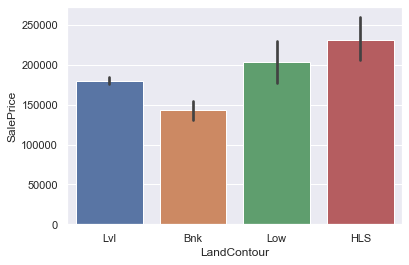

In [298]:
sns.barplot(x='LandContour', y='SalePrice', data=train)

In [299]:
def landcontourPrecess(input_):
    for i, ind in enumerate(input_.LandContour):
        if ind in ['Lvl']:
            input_.LandContour[i] = 3.5
        elif ind in ['Bnk']:
            input_.LandContour[i] = 3
        elif ind in ['Low']:
            input_.LandContour[i] = 4
        elif ind in ['HLS']:
            input_.LandContour[i] = 4.5
landcontourPrecess(train)
landcontourPrecess(test)

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

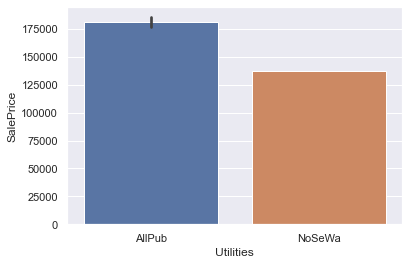

In [300]:
sns.barplot(x='Utilities', y='SalePrice', data=train)

In [301]:
def utilitiesPrecess(input_):
    for i, ind in enumerate(input_.Utilities):
        if ind in ['AllPub']:
            input_.Utilities[i] = 7
        else:
            input_.Utilities[i] = 5.5
utilitiesPrecess(train)
utilitiesPrecess(test)

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

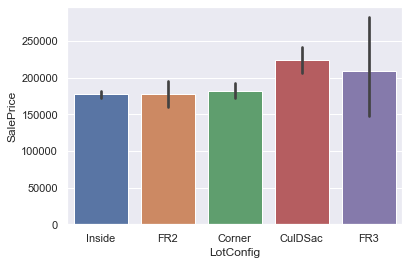

In [302]:
sns.barplot(x='LotConfig', y='SalePrice', data=train)

In [303]:
def lotconfigPrecess(input_):
    for i, ind in enumerate(input_.LotConfig):
        if ind in ['Inside', 'Corner', 'CulDSac']:
            input_.LotConfig[i] = 3.5
        elif ind in ['CulDSac']:
            input_.LotConfig[i] = 4.5
        elif ind in ['FR3', 'FR2']:
            input_.LotConfig[i] = 4
lotconfigPrecess(train)
lotconfigPrecess(test)

In [304]:
lotconfigPrecess(train)

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

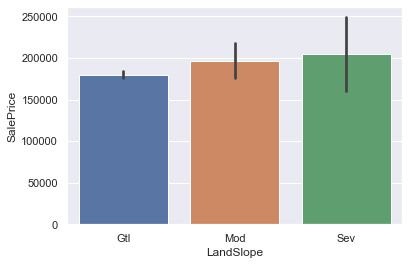

In [305]:
sns.barplot(x='LandSlope', y='SalePrice', data=train)

In [306]:
def landslopePrecess(input_):
    for i, ind in enumerate(input_.LandSlope):
        if ind in ['Gtl']:
            input_.LandSlope[i] = np.log10(3.5)
        elif ind in ['Mod']:
            input_.LandSlope[i] = np.log10(4)
        elif ind in ['Sev']:
            input_.LandSlope[i] = np.log10(4.2)
landslopePrecess(train)
landslopePrecess(test)

In [307]:

plt.figure(figsize=(15, 10), dpi=1000)
sns.barplot(x='SalePrice', y='Neighborhood',data=train)

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

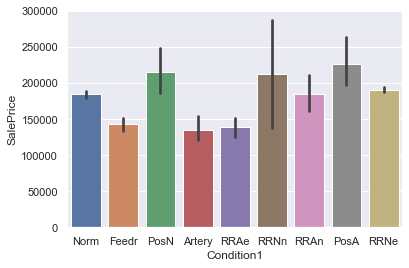

In [308]:
sns.barplot(x='Condition1', y='SalePrice', data=train)
train.drop('Condition1', axis=1, inplace=True)
test.drop('Condition1', axis=1, inplace=True)

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

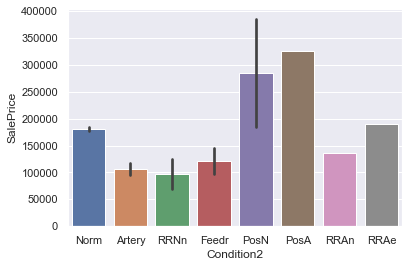

In [309]:
sns.barplot(x='Condition2', y='SalePrice', data=train)

In [310]:
def condition2Precess(input_):
    for i, ind in enumerate(input_.Condition2):
        if ind in ['Artery', 'RRNn', 'Feedr']:
            input_.Condition2[i] = 2
        elif ind in ['Norm', 'RRAn', 'RRAe']:
            input_.Condition2[i] = 3
        else:
            input_.Condition2[i] = 6
condition2Precess(train)
condition2Precess(test)
# 注意缩进

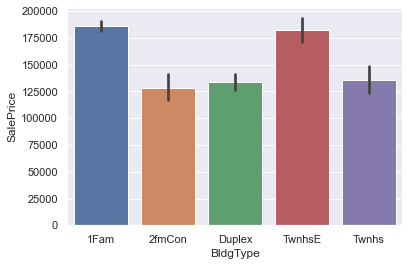

In [311]:
sns.barplot(x='BldgType', y='SalePrice', data=train)
train.drop('BldgType', axis=1, inplace=True)
test.drop('BldgType', axis=1, inplace=True)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

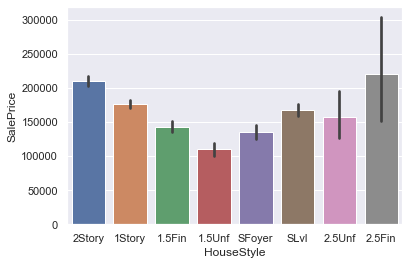

In [312]:
sns.barplot(x='HouseStyle', y='SalePrice', data=train)

In [313]:
housestyle_saleprice = train.groupby('HouseStyle').SalePrice.mean()

In [314]:
housestyle_saleprice

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

In [315]:
# 总平均值
salepariceAverage = train.SalePrice.mean()
housestyle_saleprice / salepariceAverage

HouseStyle
1.5Fin    0.791045
1.5Unf    0.608829
1Story    0.972719
2.5Fin    1.215999
2.5Unf    0.869741
2Story    1.161012
SFoyer    0.746593
SLvl      0.921414
Name: SalePrice, dtype: float64

In [316]:
def Precessfunction(input_One, input_Two, index):
    # 检查有无空缺
    
    if isinstance(index, list):
        for ind in index:
            mapSeries = input_One.groupby(ind).SalePrice.mean() / salepariceAverage
        # 获取字典
            for i, index_O in enumerate(input_One[ind]):
                input_One[ind][i] = mapSeries[index_O]
            pass
            for i, index_T in enumerate(input_Two[ind]):
                input_Two[ind][i] = mapSeries[index_T]
            pass
        pass
    else:
        ind = index
        mapSeries = input_One.groupby(ind).SalePrice.mean() / salepariceAverage
        # 获取字典
        for i, index_O in enumerate(input_One[ind]):
            input_One[ind][i] = mapSeries[index_O]
        pass
        for i, index_T in enumerate(input_Two[ind]):
            input_Two[ind][i] = mapSeries[index_T]
        pass
    pass

Precessfunction(train, test, 'HouseStyle')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

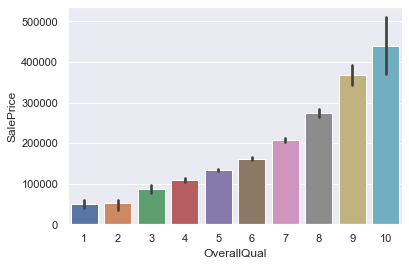

In [317]:
sns.barplot(x='OverallQual', y='SalePrice', data=train)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

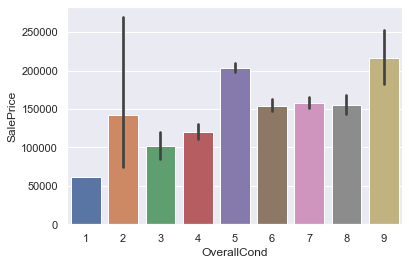

In [318]:
sns.barplot(x='OverallCond', y='SalePrice', data=train)

In [319]:
Precessfunction(train, test, 'OverallCond')

In [320]:
for col in test.columns:
    if test[col].value_counts().sum() != len(test['Id']):
        print(col)

MSZoning
LotFrontage
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [321]:
for col in train.columns:
    if train[col].value_counts().sum() != len(train['Id']):
        print(col)


LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

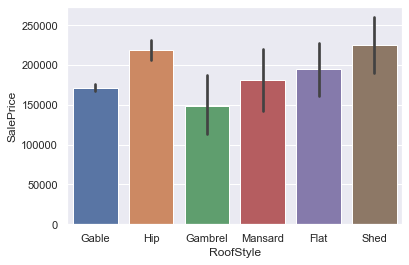

In [322]:
sns.barplot(x='RoofStyle', y='SalePrice', data=train)

In [323]:
Precessfunction(train, test, 'RoofStyle')

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

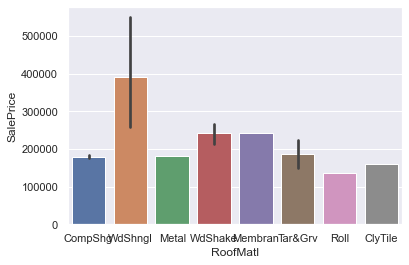

In [324]:
sns.barplot(x='RoofMatl', y='SalePrice', data=train)

In [325]:
Precessfunction(train, test, 'RoofStyle')

<AxesSubplot:xlabel='SalePrice', ylabel='Exterior1st'>

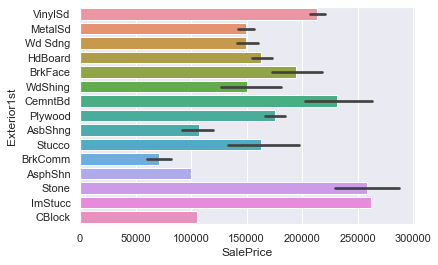

In [326]:
sns.barplot(y='Exterior1st', x='SalePrice', data=train)

In [327]:
colInput(test, 'Exterior1st', 'WdShing')

In [328]:
Precessfunction(train, test, 'Exterior1st')

In [329]:
def colDrop(col):
    
    if isinstance(col, str):
        if col in train.columns: train.drop(col, axis=1, inplace=True)
        if col in test.columns: test.drop(col, axis=1, inplace=True)
    elif isinstance(col, list):
        for c in col:
            if c in train.columns: train.drop(c, axis=1, inplace=True)
            if c in test.columns: test.drop(c, axis=1, inplace=True)

In [330]:
colDrop('Exterior2nd')

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

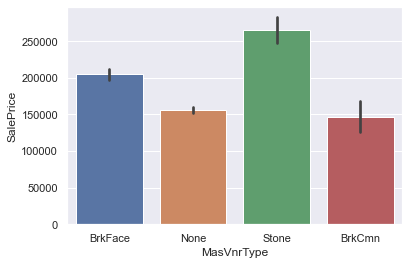

In [331]:
sns.barplot(x='MasVnrType', y='SalePrice', data=train)

In [332]:
colInput(train, 'MasVnrType', 'None')
colInput(test, 'MasVnrType', 'None')

In [333]:
Precessfunction(train, test, 'MasVnrType')

In [334]:
colInput(train, 'MasVnrArea', train.MasVnrArea.mean())
colInput(test, 'MasVnrArea', test.MasVnrArea.mean())

In [335]:
Precessfunction(train, test, 'MasVnrType')

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

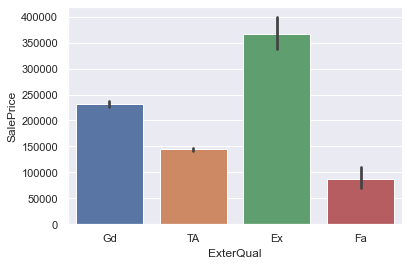

In [336]:
sns.barplot(x='ExterQual', y='SalePrice', data=train)

In [337]:
Precessfunction(train, test, 'ExterQual')

In [338]:
Precessfunction(train, test, 'ExterCond')

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

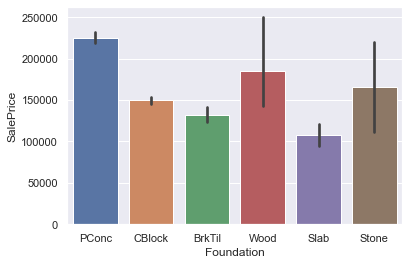

In [339]:
sns.barplot(x='Foundation', y='SalePrice', data=train)

In [340]:
Precessfunction(train, test, 'Foundation')

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

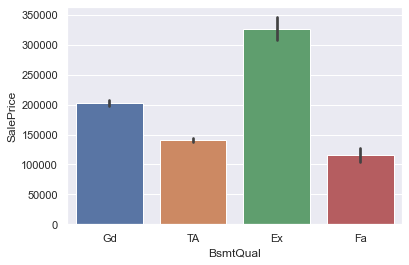

In [341]:
sns.barplot(x='BsmtQual', y='SalePrice', data=train)

In [342]:
colInput(train, 'BsmtQual', 'Ex')
colInput(test, 'BsmtQual', 'Ex')

In [343]:
Precessfunction(train, test, 'BsmtQual')

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

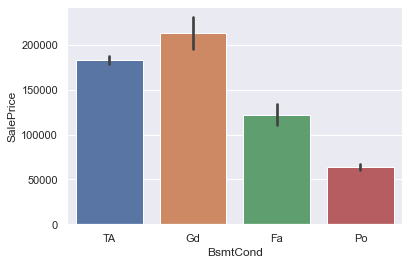

In [344]:
sns.barplot(x='BsmtCond', y='SalePrice', data=train)

In [345]:
colInput(train, 'BsmtCond', 'Gd')
colInput(test, 'BsmtCond', 'Gd')

In [346]:
Precessfunction(train, test, 'BsmtCond')

In [347]:
def precess(input_One, input_Two, col):
    target = input_One[col].value_counts().index[0]
    colInput(input_One, col, target)
    colInput(input_Two, col, target)
    Precessfunction(input_One, input_Two, col)

In [348]:
precess(train, test, 'BsmtExposure')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

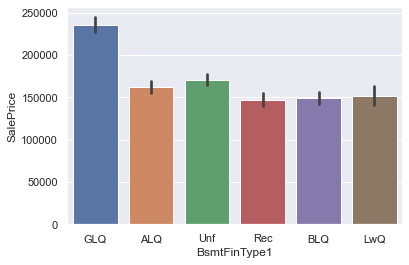

In [349]:
sns.barplot(x='BsmtFinType1', y='SalePrice', data=train)

In [350]:
precess(train, test, 'BsmtFinType1')

In [351]:
precess(train, test, 'BsmtExposure')

In [352]:
precess(train, test, 'BsmtFinType2')

In [353]:
precess(train, test, 'Heating')

In [354]:
precess(train, test, 'HeatingQC')

In [355]:
precess(train, test, 'CentralAir')

In [356]:
precess(train, test, 'Electrical')

In [357]:
precess(train, test, 'KitchenQual')

In [358]:
precess(train, test, 'Functional')

In [359]:
precess(train, test, 'FireplaceQu')

In [360]:
precess(train, test, 'GarageType')

In [361]:
precess(train, test, 'GarageFinish')

In [362]:
precess(train, test, 'GarageQual')

In [363]:
precess(train, test, 'GarageCond')

In [364]:
precess(train, test, 'PavedDrive')

In [365]:
precess(train, test, 'PoolQC')

In [366]:
precess(train, test, 'Fence')

In [367]:
precess(train, test, 'MiscFeature')

In [368]:
precess(train, test, 'SaleType')

In [369]:
precess(train, test, 'SaleCondition')

In [370]:
precess(train, test, 'RoofMatl')

In [371]:
precess(train, test, 'Neighborhood')

In [372]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
from sklearn.linear_model import LinearRegression

In [373]:
def LotFrontagetransform(input_):
    for i, ind in enumerate(input_['MSZoning']):
        if ind == 'C (all)':
            input_['MSZoning'][i] = 3
colInput(train, 'LotFrontage', 0)
colInput(test, 'LotFrontage', 0)
LotFrontagetransform(train)
LotFrontagetransform(test)

In [374]:
line = LinearRegression()
price = train.SalePrice
train.drop('SalePrice', axis=1, inplace=True)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4,3,0.0,8450,7,7,3,3.5,7,3.5,...,0,0,0.997391,1.01167,1.00048,0,2,2008,0.958438,0.96839
1,3,3,0.0,9600,7,7,3,3.5,7,4,...,0,0,0.997391,1.01167,1.00048,0,5,2007,0.958438,0.96839
2,4,3,0.0,11250,7,7,4,3.5,7,3.5,...,0,0,0.997391,1.01167,1.00048,0,9,2008,0.958438,0.96839
3,3,3,0.0,9550,7,7,4,3.5,7,3.5,...,0,0,0.997391,1.01167,1.00048,0,2,2006,0.958438,0.809892
4,4,3,0.0,14260,7,7,4,3.5,7,4,...,0,0,0.997391,1.01167,1.00048,0,12,2008,0.958438,0.96839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,3,0.0,7917,7,7,3,3.5,7,3.5,...,0,0,0.997391,1.01167,1.00048,0,8,2007,0.958438,0.96839
1456,3,3,0.0,13175,7,7,3,3.5,7,3.5,...,0,0,0.997391,1.01167,1.00048,0,2,2010,0.958438,0.96839
1457,3,3,0.0,9042,7,7,3,3.5,7,3.5,...,0,0,0.997391,0.98898,1.00048,2500,5,2010,0.958438,0.96839
1458,3,3,0.0,9717,7,7,3,3.5,7,3.5,...,0,0,0.997391,1.01167,1.00048,0,4,2010,0.958438,0.96839


In [375]:
train.to_csv('haha2.csv')

In [376]:
train.drop('GarageYrBlt', axis=1, inplace=True)
test.drop('GarageYrBlt', axis=1, inplace=True)

In [377]:
train.isna().value_counts()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition2  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition
False       False     False        False    False   False  False     False        False      False      False      False        

In [378]:
test.isna().value_counts()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition2  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition
False       False     False        False    False   False  False     False        False      False      False      False        

In [379]:
colInput(test, 'BsmtFinSF1', test['BsmtFinType2'].mean())

In [380]:
colInput(test, 'BsmtFinSF2', test['BsmtFinSF2'].mean())

In [381]:
colInput(test, 'BsmtUnfSF', test['BsmtUnfSF'].mean())

In [382]:
colInput(test, 'TotalBsmtSF', test['TotalBsmtSF'].mean())

In [383]:
colInput(test, 'BsmtFullBath', test['BsmtFullBath'].mean())

In [384]:
colInput(test, 'BsmtHalfBath', test['BsmtHalfBath'].mean())

In [385]:
colInput(test, 'GarageCars', test['GarageCars'].mean())

In [386]:
colInput(test, 'GarageArea', test['GarageArea'].mean())

In [387]:
colInput(test, 'MSZoning', test['MSZoning'])

In [388]:
# 56, 57
col = test.columns
col[56]

'GarageCars'

In [389]:
col[57]

'GarageArea'

In [390]:
test['GarageCars'].astype('int64')
test['GarageArea'].astype('int64')

0       472
1       472
2       472
3       472
4       472
       ... 
1454    472
1455    472
1456    472
1457    472
1458    472
Name: GarageArea, Length: 1459, dtype: int64

In [391]:
for i, col in enumerate(train.columns):
    print(i)
    print(type(train[col][0]))
    print(type(test[col][0]))
# BsmtFinSF1 BsmtFinSF3 BsmtUnfSF TotalBsmtSF BsmtFullBath BsmtHalfBath GarageCars GarageArea

0
<class 'numpy.int64'>
<class 'numpy.int64'>
1
<class 'int'>
<class 'int'>
2
<class 'numpy.float64'>
<class 'numpy.float64'>
3
<class 'numpy.int64'>
<class 'numpy.int64'>
4
<class 'int'>
<class 'int'>
5
<class 'int'>
<class 'int'>
6
<class 'int'>
<class 'int'>
7
<class 'float'>
<class 'float'>
8
<class 'int'>
<class 'int'>
9
<class 'float'>
<class 'float'>
10
<class 'numpy.float64'>
<class 'numpy.float64'>
11
<class 'numpy.float64'>
<class 'numpy.float64'>
12
<class 'int'>
<class 'int'>
13
<class 'numpy.float64'>
<class 'numpy.float64'>
14
<class 'numpy.int64'>
<class 'numpy.int64'>
15
<class 'numpy.int64'>
<class 'numpy.int64'>
16
<class 'numpy.int64'>
<class 'numpy.int64'>
17
<class 'numpy.int64'>
<class 'numpy.int64'>
18
<class 'numpy.float64'>
<class 'numpy.float64'>
19
<class 'numpy.float64'>
<class 'numpy.float64'>
20
<class 'numpy.float64'>
<class 'numpy.float64'>
21
<class 'numpy.float64'>
<class 'numpy.float64'>
22
<class 'numpy.float64'>
<class 'numpy.float64'>
23
<class 'nu

In [392]:
for i, col in enumerate(train.columns):
    print(i)
    print(type(train[col][0]))
    print(type(test[col][0]))


0
<class 'numpy.int64'>
<class 'numpy.int64'>
1
<class 'int'>
<class 'int'>
2
<class 'numpy.float64'>
<class 'numpy.float64'>
3
<class 'numpy.int64'>
<class 'numpy.int64'>
4
<class 'int'>
<class 'int'>
5
<class 'int'>
<class 'int'>
6
<class 'int'>
<class 'int'>
7
<class 'float'>
<class 'float'>
8
<class 'int'>
<class 'int'>
9
<class 'float'>
<class 'float'>
10
<class 'numpy.float64'>
<class 'numpy.float64'>
11
<class 'numpy.float64'>
<class 'numpy.float64'>
12
<class 'int'>
<class 'int'>
13
<class 'numpy.float64'>
<class 'numpy.float64'>
14
<class 'numpy.int64'>
<class 'numpy.int64'>
15
<class 'numpy.int64'>
<class 'numpy.int64'>
16
<class 'numpy.int64'>
<class 'numpy.int64'>
17
<class 'numpy.int64'>
<class 'numpy.int64'>
18
<class 'numpy.float64'>
<class 'numpy.float64'>
19
<class 'numpy.float64'>
<class 'numpy.float64'>
20
<class 'numpy.float64'>
<class 'numpy.float64'>
21
<class 'numpy.float64'>
<class 'numpy.float64'>
22
<class 'numpy.float64'>
<class 'numpy.float64'>
23
<class 'nu

In [393]:
all = pd.concat([train, test], axis=0)

In [394]:
test = all[1460:]

In [395]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       

In [396]:
for i, ind in enumerate(test.MSZoning):
    if not isinstance(ind, int):
        test.MSZoning[i] = 3

In [397]:
test.astype(float)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.0,2.0,0.0,11622.0,7.0,7.0,3.0,3.5,7.0,3.5,...,120.0,0.0,0.997391,1.011666,1.000475,0.0,6.0,2010.0,0.958438,0.968390
1,3.0,3.0,0.0,14267.0,7.0,7.0,4.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,0.943781,12500.0,6.0,2010.0,0.958438,0.968390
2,4.0,3.0,0.0,13830.0,7.0,7.0,4.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,1.000475,0.0,3.0,2010.0,0.958438,0.968390
3,4.0,3.0,0.0,9978.0,7.0,7.0,4.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,1.000475,0.0,6.0,2010.0,0.958438,0.968390
4,3.0,3.0,0.0,5005.0,7.0,7.0,4.0,4.5,7.0,3.5,...,144.0,0.0,0.997391,1.011666,1.000475,0.0,1.0,2010.0,0.958438,0.968390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,2.0,0.0,1936.0,7.0,7.0,3.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,1.000475,0.0,6.0,2006.0,0.958438,0.968390
1455,160.0,2.0,0.0,1894.0,7.0,7.0,3.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,1.000475,0.0,4.0,2006.0,0.958438,0.809892
1456,3.0,3.0,0.0,20000.0,7.0,7.0,3.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,1.000475,0.0,9.0,2006.0,0.958438,0.809892
1457,2.0,3.0,0.0,10441.0,7.0,7.0,3.0,3.5,7.0,3.5,...,0.0,0.0,0.997391,1.011666,1.000475,700.0,7.0,2006.0,0.958438,0.968390


In [398]:
train = all[:1460]

In [399]:
line.fit(train, price)

LinearRegression()

In [400]:
line.score(train, price)

0.866009059047939

In [401]:
line.predict(test)

array([119652.45012771, 183824.87773195, 167518.48628336, ...,
       151396.41529088, 124740.93178063, 194629.52725689])

In [402]:
from sklearn.ensemble import GradientBoostingRegressor

In [447]:
# 出现了个别极端大的值
# 降低最大的值， 设置更高的分裂标准可以防止分裂
# 深度加深提高拟合效果，但不是过度拟合
grad = GradientBoostingRegressor(min_samples_split=10, max_depth=3, max_features=20)
grad.fit(train, price)

GradientBoostingRegressor(max_features=20, min_samples_split=10)

In [448]:
grad.score(train, price)

0.9592230392727823

In [449]:
prediction = grad.predict(test)

In [450]:
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': prediction}).to_csv('resultGrad.csv', index=False)